# 1. Run Single Cap Tag Report

Run a cap tag report (same output as in Excel).
    
**Inputs** 
1. PR number and revision in form: PR_rev, i.e. '1-IWH6ME_2'
2. Directory to write cap tag report .csv file to, i.e. 'C:\\Users\\wb5888\\Documents\\Cap Tags'

**Outputs**
1. On-screen cap tag report
2. Report exported as .csv file with name CP_PR_rev.csv, i.e. '1-IWH6ME_2.csv' to directory provided above

### Input PR_rev and specify directory

In [1]:
import CapTags as ct
import numpy as np

pr_rev = '1-J5IK4K_1'

write_dir = 'C:\\Users\\wb5888\\Documents\\Cap Tags'

### View Report

View report that will be exported.

In [2]:
report = ct.get_report(pr_rev)
print('found {} accounts.'.format(len(np.unique(report.AccountID))))
report

found 2 accounts.


,CustomerName,CustomerID,LDC_Account,AccountID,UIDaccount,MarketCode,ContractID,Revision,StartTime,StopTime,TagType,Tag,SourceType,TimeStamp
0,"M/A COM TECHNOLOGY SOLUTIONS, INC",1-YPS1L,3799851007,NEPOOL_MECO_3799851007,224218,NEPOOL,1-J5IK4K,1,2014-06-01,2015-05-31 23:59:59,CAPACITY_TAG_OVRD,3061.182,H,2019-06-26 07:31:09
1,"M/A COM TECHNOLOGY SOLUTIONS, INC",1-YPS1L,3799851007,NEPOOL_MECO_3799851007,224218,NEPOOL,1-J5IK4K,1,2015-06-01,2016-05-31 23:59:59,CAPACITY_TAG_OVRD,3061.182,S,2019-06-26 07:31:09
2,"M/A COM TECHNOLOGY SOLUTIONS, INC",1-YPS1L,3799851007,NEPOOL_MECO_3799851007,224218,NEPOOL,1-J5IK4K,1,2016-06-01,2017-05-31 23:59:59,CAPACITY_TAG_OVRD,3052.479,None,2019-06-26 07:31:09
3,"M/A COM TECHNOLOGY SOLUTIONS, INC",1-YPS1L,3799851007,NEPOOL_MECO_3799851007,224218,NEPOOL,1-J5IK4K,1,2017-06-01,2018-05-31 23:59:59,CAPACITY_TAG_OVRD,3266.656,H,2019-06-26 07:31:09
4,"M/A COM TECHNOLOGY SOLUTIONS, INC",1-YPS1L,3799851007,NEPOOL_MECO_3799851007,224218,NEPOOL,1-J5IK4K,1,2018-06-01,2019-05-31 23:59:59,CAPACITY_TAG_OVRD,3458.940,H,2019-06-26 07:31:09
5,"M/A COM TECHNOLOGY SOLUTIONS, INC",1-YPS1L,3799851007,NEPOOL_MECO_3799851007,224218,NEPOOL,1-J5IK4K,1,2019-06-01,2020-05-31 23:59:59,CAPACITY_TAG_OVRD,3266.656,S,2019-06-27 09:34:13
6,"M/A COM TECHNOLOGY SOLUTIONS, INC",1-YPS1L,3799851007,NEPOOL_MECO_3799851007,224218,NEPOOL,1-J5IK4K,1,2020-06-01,2021-05-31 23:59:59,CAPACITY_TAG_OVRD,3266.656,S,2019-06-27 09:34:13
7,"M/A COM TECHNOLOGY SOLUTIONS, INC",1-YPS1L,3799851007,NEPOOL_MECO_3799851007,224218,NEPOOL,1-J5IK4K,1,2021-06-01,2031-05-31 23:59:59,CAPACITY_TAG_OVRD,3266.656,S,2019-06-27 09:34:13
8,MACOM TECHNOLOGY SOLUTIONS INC.,1-71KE63,5546445000,NEPOOL_MECO_5546445000,1541495,NEPOOL,1-J5IK4K,1,2019-06-01,2020-05-31 23:59:59,CAPACITY_TAG_OVRD,0.000,H,2019-06-27 09:38:51
9,MACOM TECHNOLOGY SOLUTIONS INC.,1-71KE63,5546445000,NEPOOL_MECO_5546445000,1541495,NEPOOL,1-J5IK4K,1,2020-06-01,2021-05-31 23:59:59,CAPACITY_TAG_OVRD,0.000,S,2019-06-27 09:38:51


### Check Dates

Ensure tags for all meters cover PR start and end dates.

In [3]:
cap_errors = ct.checkPRdates(report, pr_rev)
cap_errors

cap tags cover PR start & end dates for all accts in 1-J5IK4K_1


array([], dtype=float64)

# Offer Summary

Download forecasts (~4s *per meter*) compare cap to peaks (both actual peak and CP). Graph forecasts

In [4]:
meters, idr_dir = ct.download_idr(pr_rev, report, write_dir)

dir already created.
downloading forecasts for 2 meters...
expect to take 6.8 seconds.
download complete


In [5]:
master_idr = ct.merge_idr(meters, idr_dir)
#master_idr.fillna(0)

importing and merging .csv's...
read in and merged ch 3.


**offer_summary()** function takes parameters **min_cp** and **min_diff**, which are the minimum tag values and minimum percent differences to look at.

                        Annual_Use_MWh  Act_Peak        CP       Tag  \
AccountID                                                              
NEPOOL_MECO_3799851007       22942.240  3479.280  2918.640  3266.656   
NEPOOL_MECO_5546445000         587.562   161.906    69.551     0.000   

                        Act_Tag_Diff  Cap_Tag_Diff  
AccountID                                           
NEPOOL_MECO_3799851007      6.508919    -10.653586  
NEPOOL_MECO_5546445000           inf           inf  
PR has total usage of 23529.802 MWh.
PR has an estimated tag total of 3266.656 kWh.
PR has CP peak sum of 2988.191 kWh.
PR has peak (sum(act_peak)) of 3641.186 kWh, and 2 meters.
graphing forecasts...


TypeError: 'AxesSubplot' object is not iterable

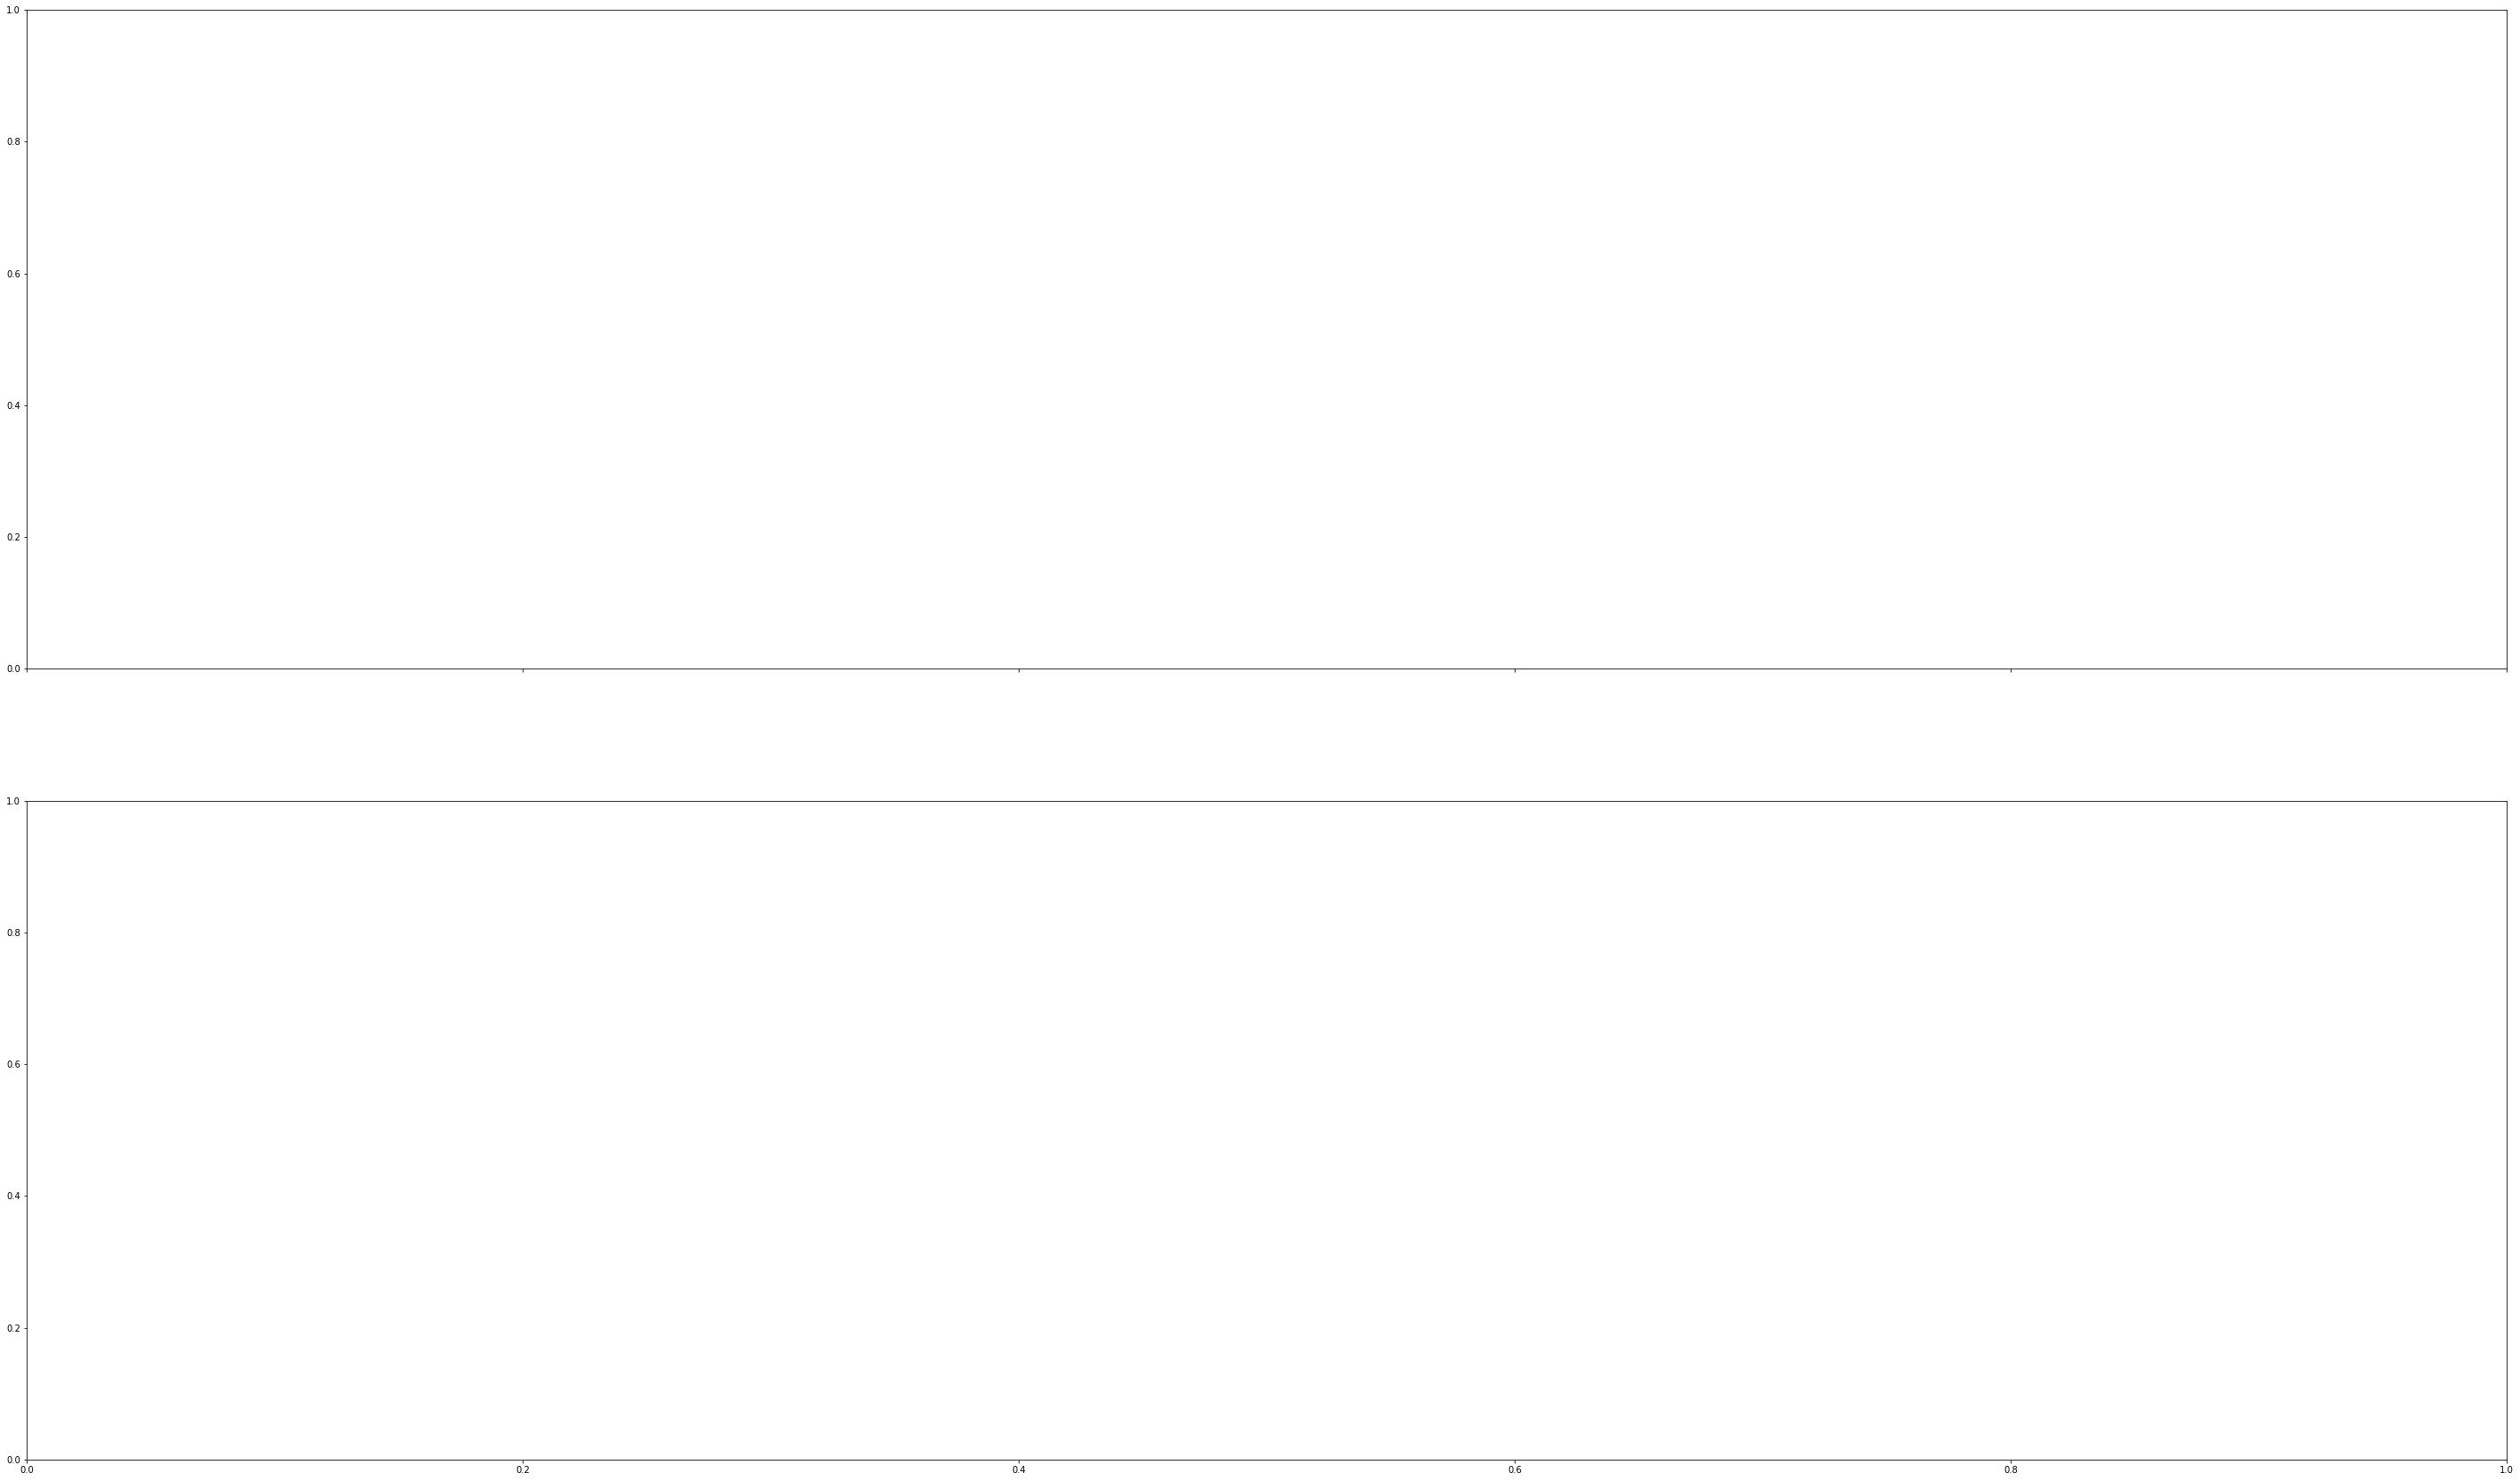

In [6]:
ct.offer_summary(master_idr, report, 0, 0)

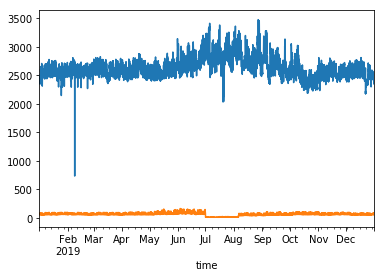

In [7]:
for m in master_idr.columns:
    tmp = master_idr[m]
    tmp.plot(y = m)

### Export Report to *write_dir*

If everything looks good report can be exported to the directory specified above.

In [7]:
ct.export_report(pr_rev, write_dir)

file exists, overwrite? (Yes or No)no
file  CP_1-J5IK4K_1.csv not saved.


# Additions

1. Get all cap tags and check time difference between Start Times (should be one year, tag missing if not)
2. Append errors to rows, or make another summary with errors

In [ ]:
curr = [start.year >= 2018 for start in report.StartTime]
cap = [tag.split('_')[0] == 'CAPACITY' for tag in report.TagType]
cap_summary = report.loc[(curr and cap),['AccountID', 'StartTime', 'StopTime']]
#cap_summary.to_csv('PJM_Ohio_Cap_Summary.csv', header = True, index = False)
#cap_summary

In [ ]:
curr = [start.year >= 2019 for start in report.StartTime]
trans = [tag.split('_')[0] == 'TRANSMISSION' for tag in report.TagType]
trans_summary = report.loc[(curr and trans),['AccountID', 'StartTime', 'StopTime']]
#trans_summary.to_csv('PJM_Ohio_Trans_Summary.csv', header = True, index = False)
#trans_summary

In [ ]:
data_import('NEPOOL_BECO_25831661001.csv')

# Offer Summary Functions

In [ ]:
def download_idr(pr_rev, report):

    subfolder = "_".join([pr_rev, 'CH3'])
    idr_dir = os.path.join(write_dir, subfolder)

    try:
        os.mkdir(idr_dir)
        print('created directory: {}'.format(idr_dir))
    
    except:
        print('dir already created.')
    

    meters = np.unique(report.AccountID)
    n = len(meters)
    time = round(3.4*n, 4)

    print('downloading forecasts for {} meters...'.format(len(np.unique(report.AccountID))))
    print('expect to take {} seconds.'.format(time))
    count = 0

    for index, accts in enumerate(meters):
        idr_file = ''.join([accts, '.csv'])
    
        if idr_file not in os.listdir(idr_dir):
            try:
                pipe_import(idr_file, idr_dir)
    
            except:
                print('error w/ download, acct {}.'.format(accts))
    
        elif idr_file in os.listdir(idr_dir):
            pass
    
        count += 1
        if (count > 0 and count % 5 == 0):
            print('downloaded data for {} out of {} meters...'.format(count, n))
        
    print('download complete')
    return(meters, idr_dir)

In [ ]:
def merge_idr(meters, idr_dir):

    print("importing and merging .csv's...")
    master_idr = pd.DataFrame()

    for accts in meters:
    
        try:
            idr_file = ''.join([accts, '.csv'])
    
            acct_idr = data_import(idr_file, idr_dir)
            acct_idr.columns = [accts]
    
            master_idr = pd.concat([master_idr, acct_idr], axis = 1)
            master_idr.fillna(0, axis = 1)
    
        except:
            print('import error, acct {}.'.format(accts))

        
    print('read in and merged ch 3.')
    master_idr.head()
    master_idr.fillna(0, axis = 1)
    
    return(master_idr)

In [ ]:
def offer_summary(master_idr, report, min_cp, min_diff):

    tag_date = dt.datetime.strptime('2019-08-29 17:00:00', '%Y-%m-%d %H:%M:%S')

    act_max = pd.DataFrame(master_idr.apply(max, axis = 0))
    cp_max = master_idr.loc[master_idr.index == tag_date].reset_index(drop = True).T

    start_yrs = [yr.year == 2019 for yr in report.StartTime]
    cap = report[['AccountID', 'Tag']].loc[start_yrs].reset_index(drop = True)
    cap = cap.set_index('AccountID')

    annual_use = pd.DataFrame(.001*master_idr.apply(sum, axis = 0), columns = ['Annual_Use'])

    peak_data = pd.concat([annual_use, act_max, cp_max, cap], axis = 1).round(decimals = 3)
    peak_data.columns = ['Annual_Use_MWh', 'Act_Peak', 'CP', 'Tag']
    peak_data['Act_Tag_Diff'] = (peak_data.Act_Peak - peak_data.Tag)/peak_data.Tag*100
    peak_data['Cap_Tag_Diff'] = (peak_data.CP - peak_data.Tag)/peak_data.Tag*100

    tot_vol = round(sum(peak_data.Annual_Use_MWh), 4)
    tot_peak = round(sum(peak_data.Act_Peak), 4)
    tot_CP = round(sum(peak_data.CP), 4)
    tag_tot = round(sum(peak_data.Tag), 4)

    print('PR has total usage of {} MWh.'.format(tot_vol))
    print('PR has an estimated tag total of {} kWh.'.format(tag_tot))
    print('PR has CP peak sum of {} kWh.'.format(tot_CP))
    print('PR has peak (sum(act_peak)) of {} kWh, and {} meters.'.format(tot_peak, len(peak_data.index)))
    high_cp = [p > min_cp for p in peak_data.CP]
    big_err = [abs(d) > min_diff for d in peak_data.Cap_Tag_Diff]
    probs = [a and b for a, b in zip(high_cp, big_err)]

    problems = peak_data[probs]
    
    if problems.empty:
        print('no cap tags included - try lowering parameters.')
        return
    
    n = len(problems.index)
    a = math.ceil(math.sqrt(n))
    b = n // a

    if (a * b < n):
        b = math.ceil(n//a)

    fig, axes = plt.subplots(nrows=a, ncols=b, sharex=True, sharey=False, figsize=(50,30))
    
    try:
        axes_list = [item for sublist in axes for item in sublist]
        axes_list = deque(axes_list)
        
    except:
        ax = axes
        
    print('graphing forecasts...')
    
    if n == 1:
        meter = problems.index[0]
        ax.set_title(meter, fontsize = 36);
        plt.rc('font', size = 24)
        meter_df = master_idr.loc[:,meter]
        rec_yr = [a < 2020 for a in meter_df.index.year]
        meter_df[rec_yr].plot(y = meter, ax = ax);
        
    elif n > 1:

        for m in problems.index:

            ax = axes_list.popleft();
            ax.set_title(m, fontsize = 36);
            plt.rc('font', size = 24)
            meter_df = master_idr.loc[:,m]
            rec_yr = [a < 2020 for a in meter_df.index.year]
            meter_df[rec_yr].plot(y = m, ax = ax);
        
    
    return(problems)

In [ ]:
def pipe_import(filename, path):

    account = filename.split('.')[0]
    ch = '3'
    final = ",".join([account, ch])
    write_path = os.path.join(path,filename)

    cmd_prmpt = ["C:\LODESTAR\Bin\intdexp", "-c", "Data Source=TPPE;User ID=tesi_interface;Password=peint88;LSProvider=ODP;",\
                 "-q", "pwrline", "-f", "C:\LODESTAR\cfg\examples\Cfg\lodestar.cfg", "-s", "01/01/2019", "-t", "12/31/2019",\
                 "-dtuse", "PARTIAL", "-d", "hi", final, "-o", write_path]

    x = Popen(cmd_prmpt, stdout = PIPE, stderr = PIPE)
    output, errors = x.communicate()

    
def data_import(file, path):
    
    os.chdir(path)
    data = pd.read_csv(file, header = None, index_col = 0, skiprows = 6)

    data.reset_index(drop = True, inplace = True)
    data.drop(data.columns[[1, 3]], axis = 1, inplace = True)
    data.columns = ['ch3', 'time']
    data.time = pd.to_datetime(data.time)
    data.index = data.time
    data.drop(data.columns[1], axis = 1, inplace = True)
    
    return(data)

In [ ]:
def issue_command(command):
    process = Popen(command, stdout=PIPE, stderr=PIPE, shell=True)
    return process.communicate()

stdout, stderr = issue_command(cmd_prmpt)